In [24]:
import pandas as pd
from src.database.database import DB
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from src.classes.process.pnl import Pnl
from tqdm import tqdm
import time
import os

LINK DO POST

In [25]:
# link do post

LINK = 'https://www.instagram.com/p/DUqPidajdPE/'

In [26]:
#bando de dados
load_dotenv()
con = DB.conexao()

DIM_P = os.getenv('DIM_P')
DIM_C = os.getenv('DIM_C')
T_FATO = os.getenv('T_FATO')
DIM_DATA = os.getenv('DIM_DATA')
DIM_S = os.getenv('DIM_S')



In [27]:

query = f'''
select 
	c.id_data as data,
    p.post,
    s.sentimento
from  {T_FATO} ft
inner join {DIM_DATA} c on ft.dim_calendario_id_data = c.id_data
inner join {DIM_P} p on p.id_post = ft.dim_post_id_post
inner join {DIM_S} s on s.id_sentimentos = ft.dim_sentimento_id_sentimentos
where p.post = '{LINK}'

;
'''
df = pd.read_sql(query,con)
df['qtde'] = 1

display(df)



C:\Users\jgust\AppData\Local\Temp\ipykernel_22656\1397672987.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,con)


,data,post,sentimento,qtde
0,2026-02-11,https://www.instagram.com/p/DUqPidajdPE/,Neutro,1
1,2026-02-11,https://www.instagram.com/p/DUqPidajdPE/,Positivo,1
2,2026-02-11,https://www.instagram.com/p/DUqPidajdPE/,Positivo,1
3,2026-02-11,https://www.instagram.com/p/DUqPidajdPE/,Positivo,1
4,2026-02-11,https://www.instagram.com/p/DUqPidajdPE/,Positivo,1
...,...,...,...,...
149,2026-02-11,https://www.instagram.com/p/DUqPidajdPE/,Positivo,1
150,2026-02-11,https://www.instagram.com/p/DUqPidajdPE/,Positivo,1
151,2026-02-11,https://www.instagram.com/p/DUqPidajdPE/,Positivo,1
152,2026-02-11,https://www.instagram.com/p/DUqPidajdPE/,Positivo,1


Gráfico de barras

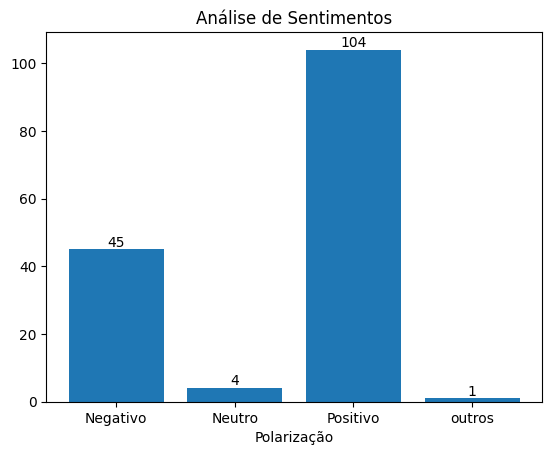

In [28]:

df_tratato = df.groupby(by=['data','sentimento','post']).sum( ).reset_index()
fig, ax = plt.subplots()
barras =ax.bar(df_tratato['sentimento'],df_tratato['qtde'])
ax.bar_label(barras)
ax.set_xlabel('Polarização')
ax.set_title('Análise de Sentimentos')
plt.show()

In [29]:
query_comment =f'''
select 
	c.comentario
from  {T_FATO} ft
inner join {DIM_P} p on p.id_post = ft.dim_post_id_post
inner join {DIM_C} c on ft.dim_comentario_id_comentario = c.id_comentario
where p.post = '{LINK}';
'''
df2 = pd.read_sql(query_comment, con)
df2.dropna()
df2.drop_duplicates()
display(df2)

C:\Users\jgust\AppData\Local\Temp\ipykernel_22656\3761884586.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql(query_comment, con)


,comentario
0,Áudio original
1,Que GOLAÇO ❤️
2,Pegaaa essa pizza 🍕 🔥 ⚡️ 👏👏
3,Golaço 🦁 😍 🚀
4,Foi o G O L 😍👏🏻
...,...
149,👏👏👏👏
150,🫵💪🦁🦁🦁
151,🔥
152,Que golaço


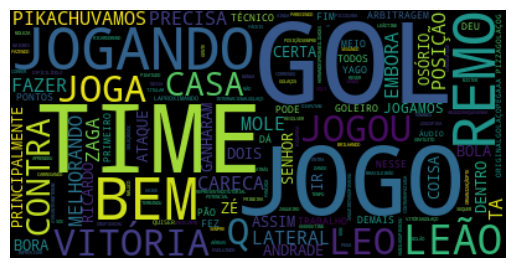

In [30]:

comentarios_ = Pnl.apply_stop_word(df2)

texto = ''.join(comentarios_)


#texto = 'joao gustavo carvalho de jesus jesus jesus joao joao gustavo gus gus gus carvalho'
nuvem_de_palavras = WordCloud().generate(texto)



fig, ax = plt.subplots()
ax.imshow(nuvem_de_palavras,interpolation='bilinear')

ax.set_axis_off()